# 🩺 Medical Image EDA: Chest X-Ray Images (Pneumonia)

This notebook performs exploratory data analysis (EDA) on the **Chest X-Ray Images (Pneumonia)** dataset, which contains X-ray scans labeled as either **NORMAL** or **PNEUMONIA**. The dataset is split into `train`, `val`, and `test` sets. The goal is to understand the data structure, class balance, and image characteristics before training a deep learning model for disease detection.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import glob
from tqdm import tqdm

## 1. Load Dataset and Build Metadata

We build a dataframe with columns for image `path`, `label`, and dataset `split` (train/val/test).


In [2]:
def get_image_data(base_dir):
    data = []
    for folder in ['train', 'val', 'test']:
        for label in ['NORMAL', 'PNEUMONIA']:
            path = os.path.join(base_dir, folder, label)
            images = glob.glob(os.path.join(path, '*.jpeg'))
            for img_path in images:
                data.append({
                    'path': img_path,
                    'set': folder,
                    'label': label
                })
    return pd.DataFrame(data)

# Update this to your actual path
base_dir = "/Users/ilkinguliyev/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray"
df = get_image_data(base_dir)

df.head()

,path,set,label
0,/Users/ilkinguliyev/.cache/kagglehub/datasets/...,train,NORMAL
1,/Users/ilkinguliyev/.cache/kagglehub/datasets/...,train,NORMAL
2,/Users/ilkinguliyev/.cache/kagglehub/datasets/...,train,NORMAL
3,/Users/ilkinguliyev/.cache/kagglehub/datasets/...,train,NORMAL
4,/Users/ilkinguliyev/.cache/kagglehub/datasets/...,train,NORMAL


## 2. Class Distribution by Dataset Split

Visualizing how many images there are in each category (NORMAL vs PNEUMONIA) across train, validation, and test sets.

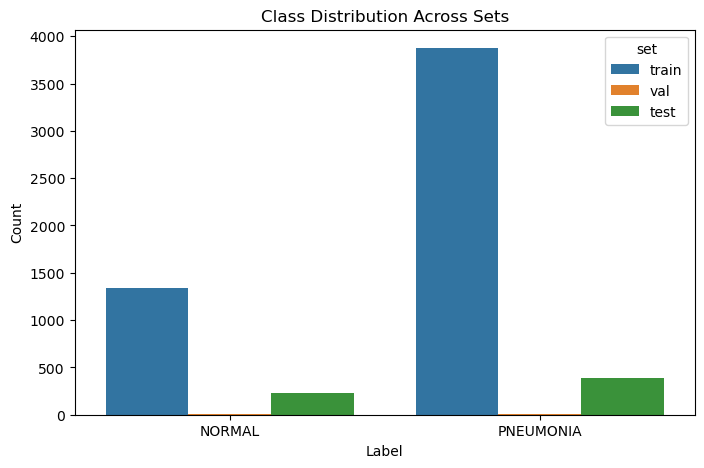

In [3]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='label', hue='set')
plt.title("Class Distribution Across Sets")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

## 3. Image Dimension Analysis

We extract width and height of all images to understand size variability. This helps decide on input resizing strategy for the model.


In [4]:
def get_image_shape(path):
    try:
        img = Image.open(path)
        return img.size  # (width, height)
    except:
        return (0, 0)

df['image_shape'] = df['path'].apply(get_image_shape)
df[['width', 'height']] = pd.DataFrame(df['image_shape'].tolist(), index=df.index)

# Filter out any unreadable or tiny images
df = df[(df['width'] > 100) & (df['height'] > 100)]

## 4. Image Size Distribution

Let’s visualize the distribution of image width and height.


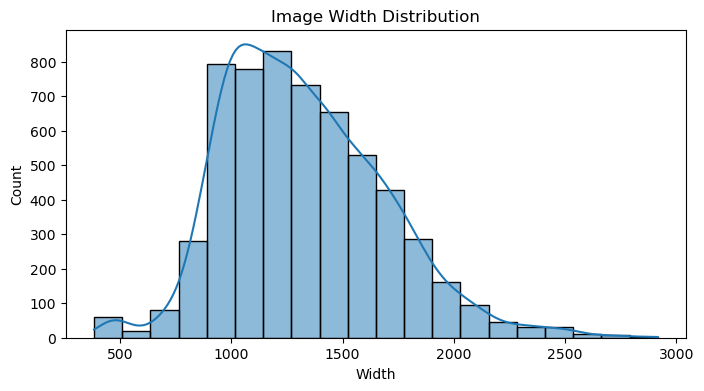

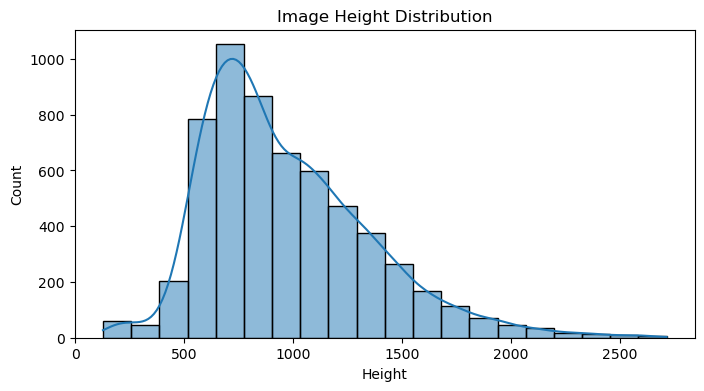

In [5]:
plt.figure(figsize=(8, 4))
sns.histplot(df['width'], bins=20, kde=True)
plt.title("Image Width Distribution")
plt.xlabel("Width")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['height'], bins=20, kde=True)
plt.title("Image Height Distribution")
plt.xlabel("Height")
plt.show()

## 5. Image Dimensions by Class

Compare image sizes between `NORMAL` and `PNEUMONIA` classes.


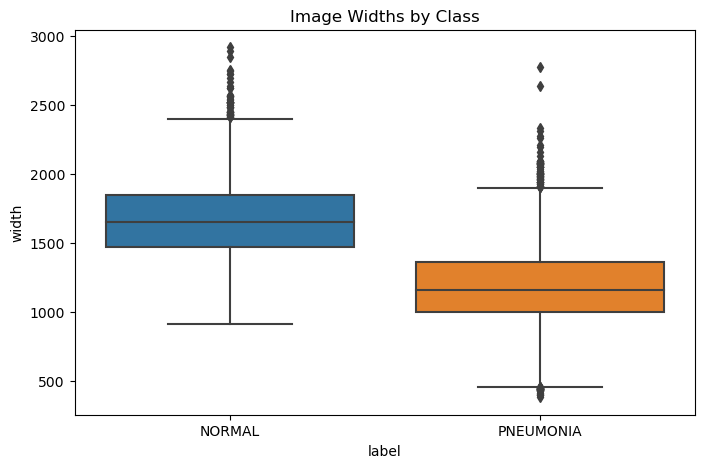

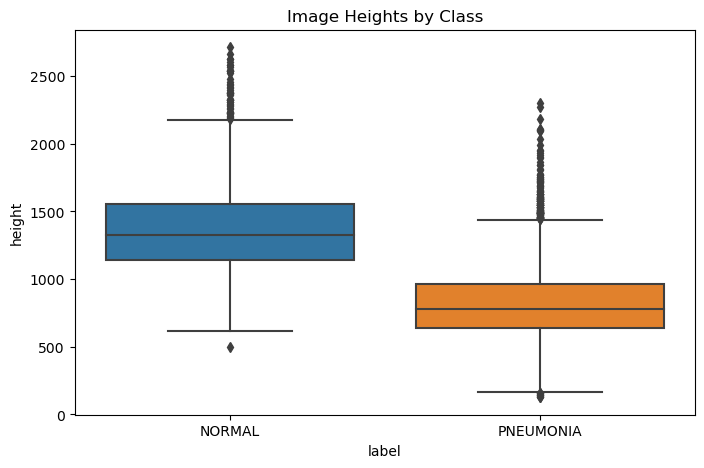

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='label', y='width')
plt.title("Image Widths by Class")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='label', y='height')
plt.title("Image Heights by Class")
plt.show()


## 6. Sample Chest X-Ray Images

Let’s preview a few images to get a visual understanding of the classes.


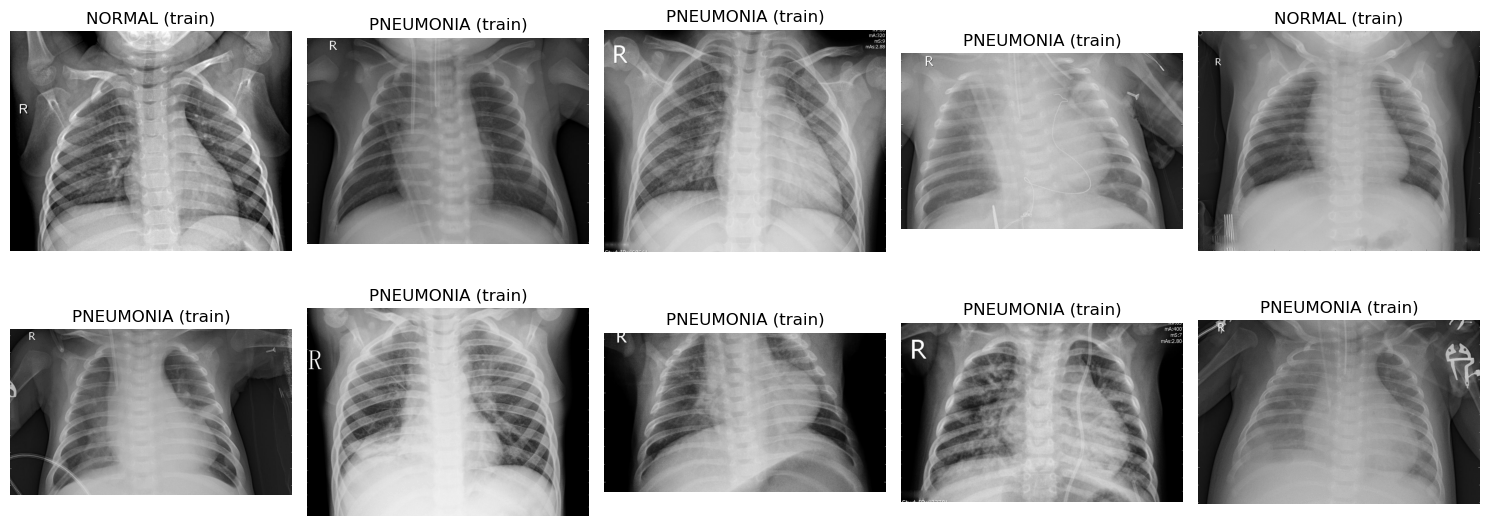

In [7]:
import matplotlib.image as mpimg
import random

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
samples = df.sample(10).reset_index(drop=True)
for i, ax in enumerate(axs.flat):
    img = mpimg.imread(samples.loc[i, 'path'])
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{samples.loc[i, 'label']} ({samples.loc[i, 'set']})")
    ax.axis('off')
plt.tight_layout()
plt.show()
